# TensorFlow最初の一歩

# TensorFlowで線形回帰モデル

### 参考資料

- [Getting Started With TensorFlow](https://www.tensorflow.org/get_started/get_started)

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

## TensorFlowのAPI

TensorFlowにはレベルに応じた複数のAPIが存在

- 低レベルAPI
  - 自分でモデルを改良したい人向け
  - TensorFlow Core　←　**今回はこっち**
- 高レベルAPI
  - 既存のモデルを素早く試したい人向け
  - tf.contrib.learn
  - tf.contrib.slim
  - tf.contrib.keras (it's coming)
    - [tf-keras](https://github.com/fchollet/keras/tree/tf-keras)  on the Keras side
    - [tf.contrib.keras](https://github.com/tensorflow/tensorflow/tree/master/tensorflow/contrib/keras) on the TensorFlow side
    - [F. Cholletさんによるツイッター上でのコメント](https://twitter.com/fchollet/status/820746845068505088)



contribとついているのはまだ開発中ということ

## テンソル

- テンソル（tensor）がTensorFlowで扱うデータ形式の基本
- テンソルのランク（rank）＝テンソルの次元

```
3 # ランク 0 のテンソル。 シェイプが [] のスカラ
[1. ,2., 3.] # ランク1のテンソル。シェイプが [3] のベクトル
[[1., 2., 3.], [4., 5., 6.]] # ランク2のテンソル。シェイプが [2, 3] の行列
[[[1., 2., 3.]], [[7., 8., 9.]]] # ランク3でシェイプが[2, 3]のテンソル
```

## TensorFlowのインポート

In [2]:
import tensorflow as tf

## 計算グラフ

計算グラフの裏にある思想
- 重い計算は全てPythonの外側でやる

Pythonの仕事
  - 計算グラフを作ること
  - どの部分の計算グラフを実行するか決めること

２つのステップ

- ステップ１：計算グラフの構築
- ステップ２：計算グラフの実行

計算グラフとは？

- 計算グラフとは計算の手順を表した「ノード」のあつまり

ノード

- ノードは0以上のテンソルを入力として受け取り、1つのテンソルを出力する。
- 例： constantノード
- ノードを評価して値を得るためには、セッション中で計算グラフを実行しなくてはいけない

## 計算グラフの構築

テンソルノード（`tf.Tensor`）に演算（Operation）を適用することで、より複雑な計算グラフを構築していく

In [3]:
# 定数ノードを作成（node1とnode2）
node1 = tf.constant(3.0, tf.float32)
node2 = tf.constant(4.0, tf.float32)
# 2つの定数ノードを足し合わせて、新しいノード（node3）を作成
node3 = tf.add(node1, node2)

print(node1)
print(node2)
print(node3)

Tensor("Const:0", shape=(), dtype=float32)
Tensor("Const_1:0", shape=(), dtype=float32)
Tensor("Add:0", shape=(), dtype=float32)


## 計算グラフの実行

- sess = tf.Session()
- sess = tf.InteractiveSession()
- `sess.run(t)` と `t.eval()` はほぼ同じ。
- `sess.run()`の場合は、`t.eval()`と違い、`sess.run([a, b, c])`とできる

## TensorFlowのセッション: tf.Session()

- TensorFlowはC++のバックエンドに繋いでから計算する。
- このバックエンドとのコネクションはセッションと呼ばれる。
- 通常は計算グラフを構築した後、セッション内で実行。

In [4]:
# withを抜けるとセッションは自動的に閉じられる。
with tf.Session() as sess:
    
    print(sess)
    print('----')
    
    print(sess.run(node1))
    print(node1.eval())
    print('----')
    
    print(sess.run(node2))
    print(node2.eval())
    print('----')
    
    print(sess.run(node3))
    print(node3.eval())
    print('----')
    
    print(sess.run([node1, node2, node3]))

----
3.0
3.0
----
4.0
4.0
----
7.0
7.0
----
[3.0, 4.0, 7.0]


In [5]:
# withを抜けるとセッションが閉じられれているので以下のコードはエラーになる
#sess.run(node1)  # エラー
#node1.eval()  # エラー

## TensorFlowのインタラクティブセッション:  tf.InteractiveSession()

- インタラクティブなセッションというのも可能
- IPythonやJupyter NotebookでTensorFlowを使う場合に便利
- `sess.close()` で明示的に閉じる必要あり

In [6]:
sess = tf.InteractiveSession()
print(sess)

In [7]:
sess.run(node3)

7.0

In [8]:
node3.eval()

7.0

In [9]:
# セッションを閉じる
sess.close()

In [10]:
#sess.run(node3)

In [11]:
sess = tf.InteractiveSession()

In [12]:
print(sess)
print('----')

print(sess.run(node1))
print(node1.eval())
print('----')

print(sess.run(node2))
print(node2.eval())
print('----')

print(sess.run(node3))
print(node3.eval())
print('----')

print(sess.run([node1, node2, node3]))

----
3.0
3.0
----
4.0
4.0
----
7.0
7.0
----
[3.0, 4.0, 7.0]


feed_dictで評価時にテンソルの値を変更。placeholder以外でもテンソルなら何でも変更できる。

In [13]:
print(sess.run([node1, node2, node3]))
print(sess.run([node1, node2, node3], feed_dict={node1:10.0}))

[3.0, 4.0, 7.0]
[array(10.0, dtype=float32), 4.0, 14.0]


## 計算グラフの可視化

## 方法１：計算グラフをテキストで可視化

- `tf.get_default_graph().as_graph_def()`

In [14]:
tf.get_default_graph().as_graph_def()

node {
  name: "Const"
  op: "Const"
  attr {
    key: "dtype"
    value {
      type: DT_FLOAT
    }
  }
  attr {
    key: "value"
    value {
      tensor {
        dtype: DT_FLOAT
        tensor_shape {
        }
        float_val: 3.0
      }
    }
  }
}
node {
  name: "Const_1"
  op: "Const"
  attr {
    key: "dtype"
    value {
      type: DT_FLOAT
    }
  }
  attr {
    key: "value"
    value {
      tensor {
        dtype: DT_FLOAT
        tensor_shape {
        }
        float_val: 4.0
      }
    }
  }
}
node {
  name: "Add"
  op: "Add"
  input: "Const"
  input: "Const_1"
  attr {
    key: "T"
    value {
      type: DT_FLOAT
    }
  }
}
versions {
  producer: 21
}

## 方法２: TensorBoard

In [15]:
writer = tf.summary.FileWriter('./graphs01', sess.graph)  # イベントファイルを保存
writer.close()

ターミナルに以下のコードを打って、tensorboardを立ち上げる。

```
tensorboard --logdir="./graphs01" --port 6006
```

ウエブブラウザで以下のアドレスに行き、tensorboardを見る。

```
localhost:6006
```

## 外部入力（`tf.placeholder`）

```
tf.placeholder(dtype, shape=None, name=None)
```

- このままだと同じ出力しか出てこないので面白くない...
- 外部入力ほしい！
- そんなときの placeholder (`tf.placeholder`)
- placeholderで計算グラフに外部入力をつける（後でここに値入れますよと約束する）

#### やってみよう
a, bという２つの外部入力から得られた値を足し合わせる計算グラフを構築せよ。

ヒント: `tf.placeholder`, `tf.add`

In [16]:
a = tf.placeholder(tf.float32)
b = tf.placeholder(tf.float32)

In [17]:
adder_node = tf.add(a, b)  # a + b は tf.add(a, b) のショートカット

- sess.run()の第二引数（`feed_dict`）を使い、計算グラフの外部入力（placeholder）に値を入れる。
- feed_dictの中のキー`a` と`b`はテンソル
- `shape=None`の問題
  - 簡単だが、後々デバッグが大変になる
  - 子ノードのshapeの自動推定ができなくなる
- placeholderはops  

In [18]:
# aに3.0, bに4.5という値を入れて評価
print(sess.run(adder_node, feed_dict={a: 3, b: 4.5}))

7.5


In [19]:
# aに[1, 3], bに[2, 4]というベクトルを入れて評価
print(sess.run(adder_node, feed_dict={a: [1, 3], b: [2, 4]}))

[ 3.  7.]


In [20]:
writer = tf.summary.FileWriter('./graphs01', sess.graph)  # イベントファイルを保存
writer.close()

計算グラフに徐々に処理を追加していける。

In [21]:
add_and_triple = adder_node * 3.
print(sess.run(add_and_triple, {a: 3, b: 4.5})) # feed_dictは省略できる

22.5


In [22]:
writer = tf.summary.FileWriter('./graphs01', sess.graph)  # イベントファイルを保存
writer.close()

## 変数（`tf.Variable`）

- パラメータ
- データ型と初期値を与えて初期化    `tf.Variable([.3], tf.float32)`

y = 0.3 x - 0.3

In [23]:
# 線形モデルの計算グラフを構築
W = tf.Variable([.3], tf.float32)  # パラメータ
b = tf.Variable([-.3], tf.float32)  # パラメータ
x = tf.placeholder(tf.float32)  # 外部入力
linear_model = W * x + b  # 線形モデル

In [24]:
writer = tf.summary.FileWriter('./graphs01', sess.graph)  # イベントファイルを保存
writer.close()

## 初期化

- `tf.constant`は呼んだときに初期化され、値は変化しない。
- `tf.Variable`を初期化するには、以下のようにする必要あり。

In [25]:
# 変数の初期化
init = tf.global_variables_initializer()  # 変数を初期化する処理を計算グラフに追加
sess.run(init) # 初期化を実行

## 複数の値に対して実行

In [26]:
sess.run(linear_model, {x:[1,2,3,4]})

array([ 0.        ,  0.30000001,  0.60000002,  0.90000004], dtype=float32)

## 出力の評価

- モデルの出力を評価するためには正しい出力が必要
- 正しい出力を入れるところ（外部入力）が必要

In [27]:
y = tf.placeholder(tf.float32)  # 正しい出力を入れるところ

In [28]:
squared_deltas = tf.square(linear_model - y)  ## 各要素を二乗

In [29]:
loss = tf.reduce_sum(squared_deltas)  ## ベクトル要素を足し合わせ、二乗誤差を作成

In [30]:
sess.run(loss, {x: [1, 2, 3, 4], y: [0, -1, -2, -3]})

23.66

In [31]:
writer = tf.summary.FileWriter('./graphs01', sess.graph)  # イベントファイルを保存
writer.close()

## 手動でパラメータの値を設定

<!-- [-1, 1] -->

In [32]:
# 手動で値を設定（tf.assign）
fixW = tf.assign(W, [10.])
fixb = tf.assign(b, [10])

In [33]:
sess.run([W, b])

[array([ 0.30000001], dtype=float32), array([-0.30000001], dtype=float32)]

In [34]:
sess.run([fixW, fixb])

[array([ 10.], dtype=float32), array([ 10.], dtype=float32)]

In [35]:
sess.run([W, b])

[array([ 10.], dtype=float32), array([ 10.], dtype=float32)]

In [36]:
# エラーの値を表示
sess.run(loss, {x: [1, 2, 3, 4], y: [0, -1, -2, -3]})

5934.0

In [37]:
writer = tf.summary.FileWriter('./graphs01', sess.graph)  # イベントファイルを保存
writer.close()

## 自動でパラメータの値を調整（tf.train API）

- TensorFlow自体が最適化手法（損失関数を減らすように少しずつパラメータを変化させる方法）のAPIを提供
- 勾配法が一番シンプル
- 損失関数のパラメータに対する勾配は`tf.gradients`で得られる

In [38]:
# 最適化手法を選定
optimizer = tf.train.GradientDescentOptimizer(0.01)

In [39]:
# 最適化する損失関数を登録
train = optimizer.minimize(loss)

In [40]:
all_loss = []
all_W = []
all_b = []

sess.run(init)

curr_loss, curr_W, curr_b = sess.run([loss, W, b], 
                                     feed_dict={x: [1, 2, 3, 4], y: [0, -1, -2, -3]})

all_loss.append(curr_loss)
all_W.append(curr_W)
all_b.append(curr_b)

for i in range(500):
    
    _, curr_loss , curr_W, curr_b= sess.run([train, loss, W, b], 
                            feed_dict={x: [1, 2, 3, 4], y: [0, -1, -2, -3]})

    all_loss.append(curr_loss)
    all_W.append(curr_W)
    all_b.append(curr_b)

In [41]:
writer = tf.summary.FileWriter('./graphs01', sess.graph)  # イベントファイルを保存
writer.close()

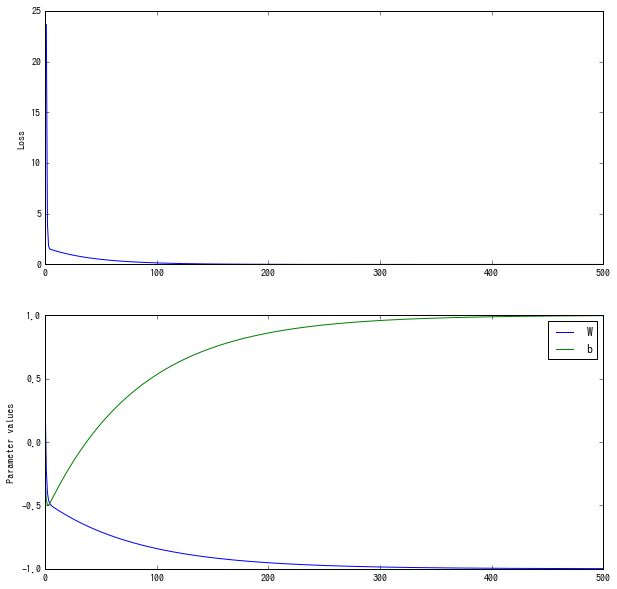

In [42]:
fig, ax = plt.subplots(2,1,figsize=(10, 10))

ax[0].plot(all_loss)
ax[0].set_ylabel('Loss')


ax[1].plot(all_W, label='W')
ax[1].plot(all_b, label='b')
ax[1].set_ylabel('Parameter values')
ax[1].legend()